In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die echten Daten
df = pd.read_csv('/workspaces/bakery_sales_prediction/5_Datasets/additional data/data_clean_with_prices.csv')

print(f"Datensatz-Shape: {df.shape}")
print(f"Umsatz-Spalte verfügbar: {'Umsatz' in df.columns}")
print(f"Umsatz-Statistiken:\n{df['Umsatz'].describe()}")

Datensatz-Shape: (9334, 40)
Umsatz-Spalte verfügbar: True
Umsatz-Statistiken:
count    9334.000000
mean      201.420387
std       124.753529
min        59.208548
25%        96.897441
50%       161.900831
75%       280.644663
max       494.258576
Name: Umsatz, dtype: float64


=== IQR-Methode ===
Anzahl Ausreißer: 0
Prozent Ausreißer: 0.00%
Grenzen: -178.72 bis 556.27

=== 1.5 SD-Methode ===
Anzahl Ausreißer: 944
Prozent Ausreißer: 10.11%
Grenzen: 14.29 bis 388.55


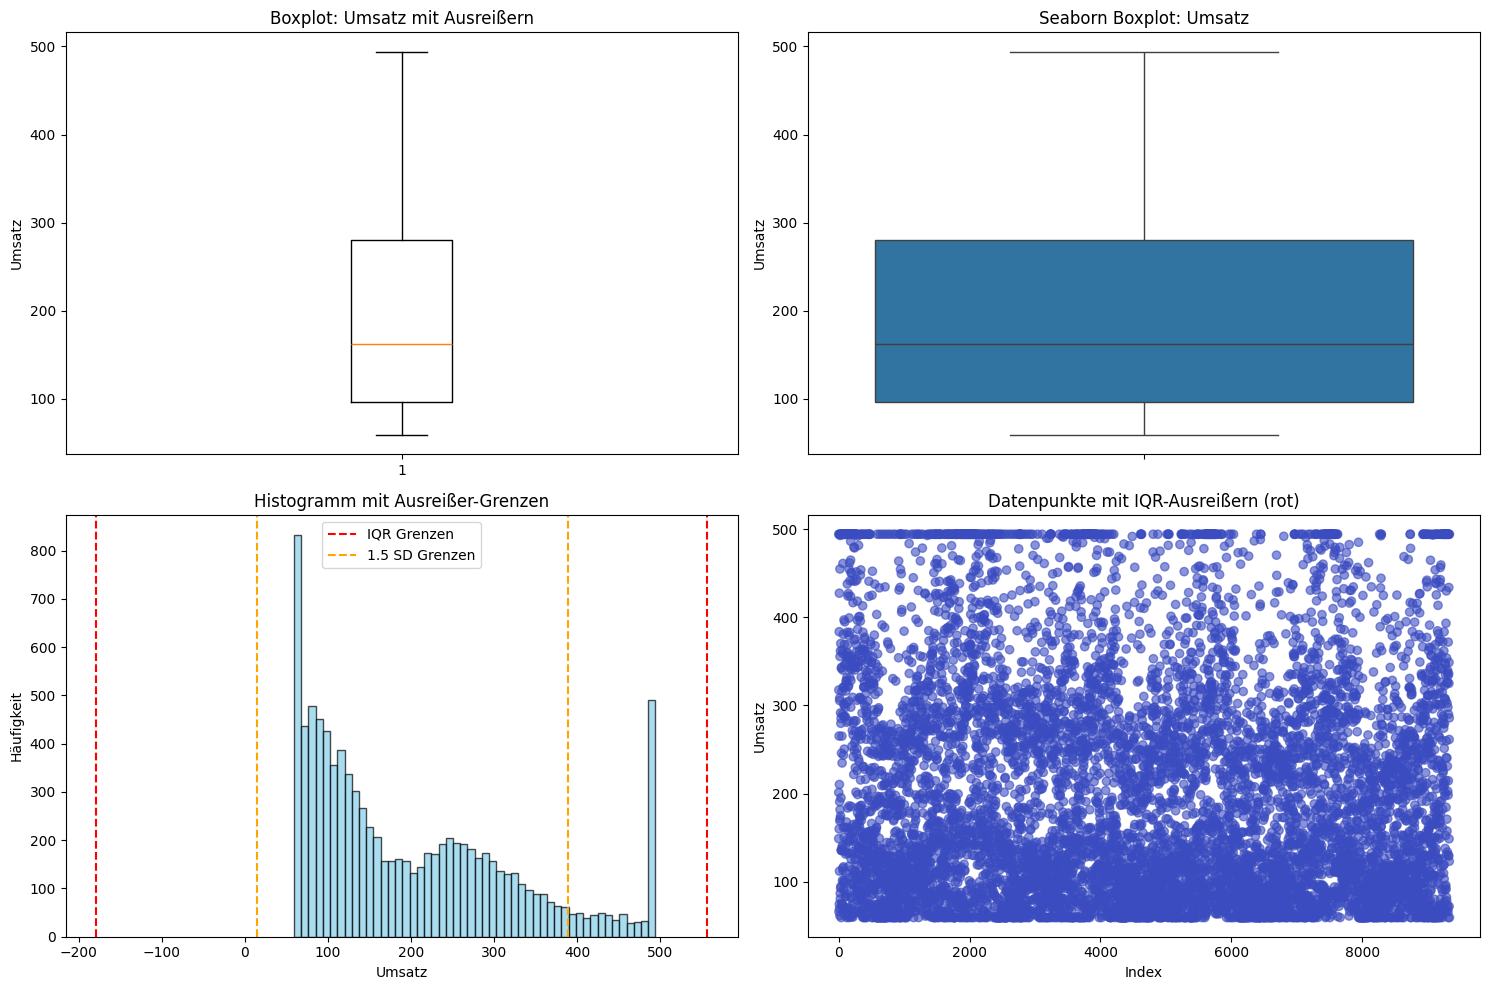


=== Methodenvergleich ===
Ausreißer in beiden Methoden: 0
Nur IQR-Ausreißer: 0
Nur 1.5 SD-Ausreißer: 944


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a dataset with 'Umsatz' column
# If you need to load data, uncomment and modify the line below:
df = pd.read_csv('/workspaces/bakery_sales_prediction/5_Datasets/additional data/data_clean_with_prices.csv')

# Method 1: IQR method for outlier detection
Q1 = df['Umsatz'].quantile(0.25)
Q3 = df['Umsatz'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create binary outlier indicator column
df['ist_ausreiser'] = ((df['Umsatz'] < lower_bound) | (df['Umsatz'] > upper_bound)).astype(int)

# Method 2: 1.5 Standard Deviation method for outlier detection
mean_umsatz = df['Umsatz'].mean()
std_umsatz = df['Umsatz'].std()

# Define outlier boundaries using 1.5 SD
lower_bound_sd = mean_umsatz - 1.5 * std_umsatz
upper_bound_sd = mean_umsatz + 1.5 * std_umsatz

# Create binary outlier indicator column for SD method
df['ist_ausreiser_sd'] = ((df['Umsatz'] < lower_bound_sd) | (df['Umsatz'] > upper_bound_sd)).astype(int)

# Display statistics for both methods
print("=== IQR-Methode ===")
print(f"Anzahl Ausreißer: {df['ist_ausreiser'].sum()}")
print(f"Prozent Ausreißer: {df['ist_ausreiser'].mean()*100:.2f}%")
print(f"Grenzen: {lower_bound:.2f} bis {upper_bound:.2f}")

print("\n=== 1.5 SD-Methode ===")
print(f"Anzahl Ausreißer: {df['ist_ausreiser_sd'].sum()}")
print(f"Prozent Ausreißer: {df['ist_ausreiser_sd'].mean()*100:.2f}%")
print(f"Grenzen: {lower_bound_sd:.2f} bis {upper_bound_sd:.2f}")

# Boxplot visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Basic boxplot
plt.subplot(2, 2, 1)
plt.boxplot(df['Umsatz'])
plt.title('Boxplot: Umsatz mit Ausreißern')
plt.ylabel('Umsatz')

# Subplot 2: Boxplot with seaborn for better visualization
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Umsatz'])
plt.title('Seaborn Boxplot: Umsatz')

# Subplot 3: Histogram with outlier boundaries
plt.subplot(2, 2, 3)
plt.hist(df['Umsatz'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'IQR Grenzen')
plt.axvline(upper_bound, color='red', linestyle='--')
plt.axvline(lower_bound_sd, color='orange', linestyle='--', label=f'1.5 SD Grenzen')
plt.axvline(upper_bound_sd, color='orange', linestyle='--')
plt.title('Histogramm mit Ausreißer-Grenzen')
plt.xlabel('Umsatz')
plt.ylabel('Häufigkeit')
plt.legend()

# Subplot 4: Scatter plot showing outliers
plt.subplot(2, 2, 4)
plt.scatter(range(len(df)), df['Umsatz'], 
           c=df['ist_ausreiser'], cmap='coolwarm', alpha=0.6)
plt.title('Datenpunkte mit IQR-Ausreißern (rot)')
plt.xlabel('Index')
plt.ylabel('Umsatz')

plt.tight_layout()
plt.show()

# Comparison of methods
print(f"\n=== Methodenvergleich ===")
beide_methoden = df['ist_ausreiser'] & df['ist_ausreiser_sd']
nur_iqr = df['ist_ausreiser'] & ~df['ist_ausreiser_sd']
nur_sd = ~df['ist_ausreiser'] & df['ist_ausreiser_sd']

print(f"Ausreißer in beiden Methoden: {beide_methoden.sum()}")
print(f"Nur IQR-Ausreißer: {nur_iqr.sum()}")
print(f"Nur 1.5 SD-Ausreißer: {nur_sd.sum()}")

# Empfehlung für Neuronale Netze

Für die Vorbereitung der Daten für neuronale Netze sollten wir folgende Faktoren berücksichtigen:

1. **IQR-Methode** ist robuster gegen extreme Ausreißer
2. **Neuronale Netze** sind empfindlich gegenüber extremen Werten
3. **Geschäftskritische Überlegung**: Hohe Umsätze könnten wichtige Muster enthalten

=== ANALYSE FÜR NEURONALE NETZE ===

Originaldaten:
Mean: 201.42
Std: 124.75
Skewness: 0.851
Min: 59.21, Max: 494.26

Nach IQR-Filterung (9334 Datenpunkte):
Mean: 201.42
Std: 124.75
Skewness: 0.851
Min: 59.21, Max: 494.26

Nach 1.5 SD-Filterung (8390 Datenpunkte):
Mean: 171.77
Std: 92.09
Skewness: 0.577
Min: 59.21, Max: 388.46


/tmp/ipykernel_20799/3545816111.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(data_to_plot, labels=['Original', 'IQR-gefiltert', '1.5 SD-gefiltert'])


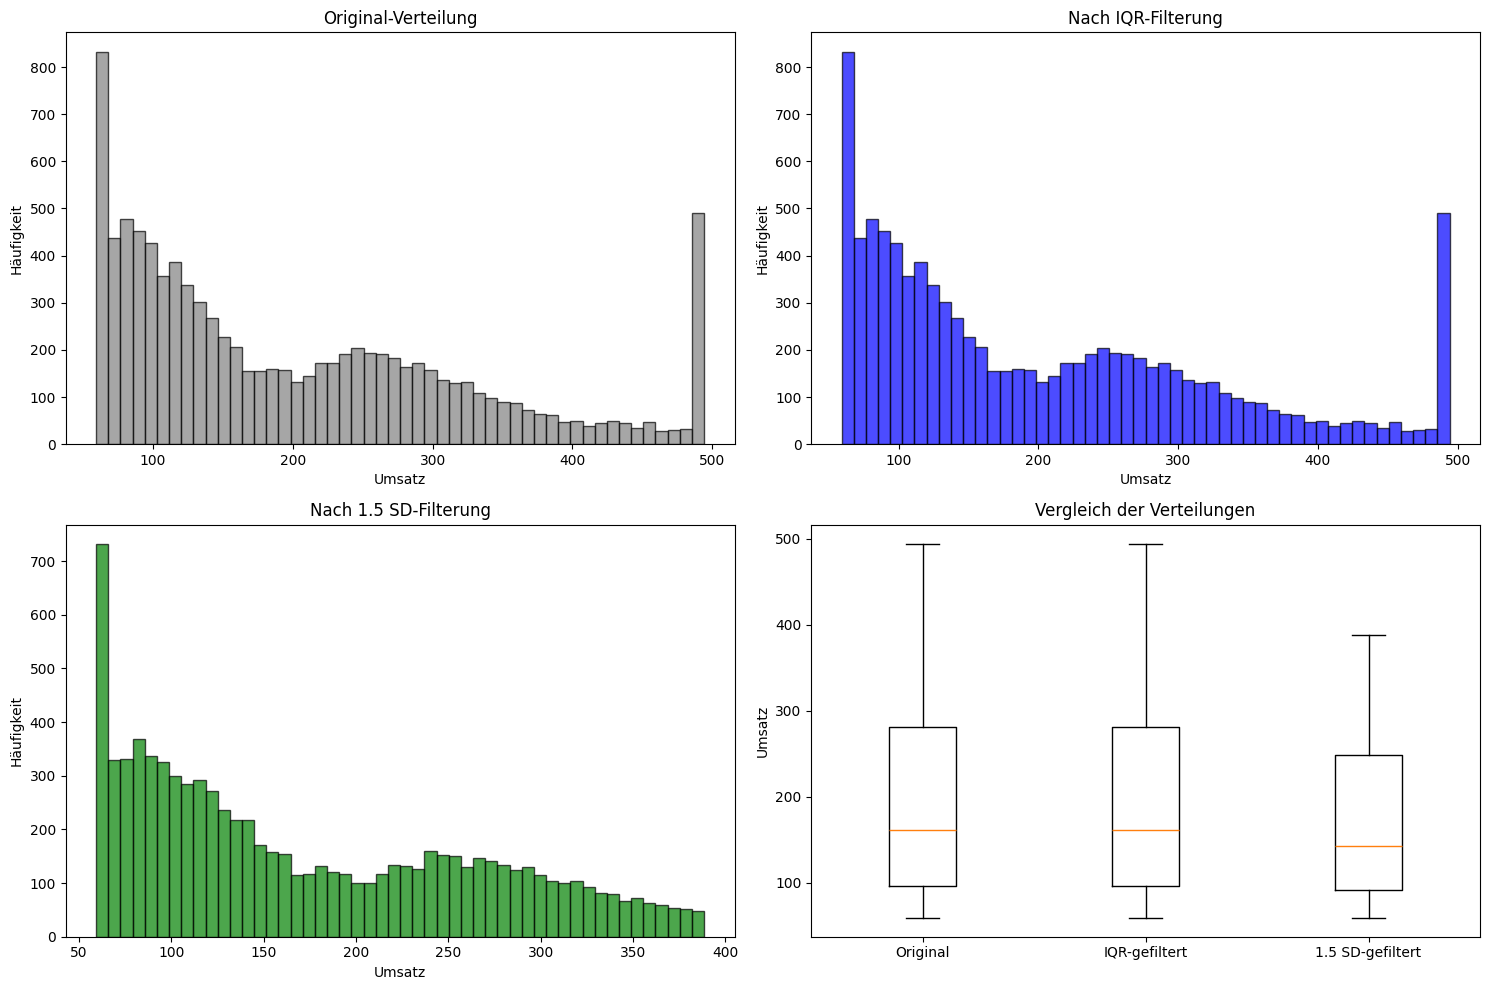


EMPFEHLUNG FÜR NEURONALE NETZE:
Datenverlust IQR: 0.0%
Datenverlust 1.5 SD: 10.1%

⚠️ EMPFEHLUNG: Moderater Ansatz - Capping statt Entfernung
Gründe:
- Zu hohe Datenverluste bei beiden Methoden
- Outlier-Capping preserve mehr Daten

Finaler Datensatz: 9334 Datenpunkte
Bereit für Normalisierung und NN-Training!


In [4]:
# Analyse für Neuronale Netze - Empfehlung der besten Ausreißer-Behandlung

# Vergleiche die Auswirkungen auf die Datenverteilung
print("=== ANALYSE FÜR NEURONALE NETZE ===\n")

# Originaldaten
print("Originaldaten:")
print(f"Mean: {df['Umsatz'].mean():.2f}")
print(f"Std: {df['Umsatz'].std():.2f}")
print(f"Skewness: {df['Umsatz'].skew():.3f}")
print(f"Min: {df['Umsatz'].min():.2f}, Max: {df['Umsatz'].max():.2f}")

# Nach IQR-Filterung
df_iqr_filtered = df[df['ist_ausreiser'] == 0].copy()
print(f"\nNach IQR-Filterung ({len(df_iqr_filtered)} Datenpunkte):")
print(f"Mean: {df_iqr_filtered['Umsatz'].mean():.2f}")
print(f"Std: {df_iqr_filtered['Umsatz'].std():.2f}")
print(f"Skewness: {df_iqr_filtered['Umsatz'].skew():.3f}")
print(f"Min: {df_iqr_filtered['Umsatz'].min():.2f}, Max: {df_iqr_filtered['Umsatz'].max():.2f}")

# Nach SD-Filterung
df_sd_filtered = df[df['ist_ausreiser_sd'] == 0].copy()
print(f"\nNach 1.5 SD-Filterung ({len(df_sd_filtered)} Datenpunkte):")
print(f"Mean: {df_sd_filtered['Umsatz'].mean():.2f}")
print(f"Std: {df_sd_filtered['Umsatz'].std():.2f}")
print(f"Skewness: {df_sd_filtered['Umsatz'].skew():.3f}")
print(f"Min: {df_sd_filtered['Umsatz'].min():.2f}, Max: {df_sd_filtered['Umsatz'].max():.2f}")

# Visualisierung der Verteilungen
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original
axes[0,0].hist(df['Umsatz'], bins=50, alpha=0.7, color='gray', edgecolor='black')
axes[0,0].set_title('Original-Verteilung')
axes[0,0].set_xlabel('Umsatz')
axes[0,0].set_ylabel('Häufigkeit')

# IQR gefiltert
axes[0,1].hist(df_iqr_filtered['Umsatz'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0,1].set_title('Nach IQR-Filterung')
axes[0,1].set_xlabel('Umsatz')
axes[0,1].set_ylabel('Häufigkeit')

# SD gefiltert
axes[1,0].hist(df_sd_filtered['Umsatz'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1,0].set_title('Nach 1.5 SD-Filterung')
axes[1,0].set_xlabel('Umsatz')
axes[1,0].set_ylabel('Häufigkeit')

# Vergleich Boxplots
data_to_plot = [df['Umsatz'], df_iqr_filtered['Umsatz'], df_sd_filtered['Umsatz']]
axes[1,1].boxplot(data_to_plot, labels=['Original', 'IQR-gefiltert', '1.5 SD-gefiltert'])
axes[1,1].set_title('Vergleich der Verteilungen')
axes[1,1].set_ylabel('Umsatz')

plt.tight_layout()
plt.show()

# EMPFEHLUNG
print("\n" + "="*60)
print("EMPFEHLUNG FÜR NEURONALE NETZE:")
print("="*60)

# Berechne Datenverlust
iqr_loss = (len(df) - len(df_iqr_filtered)) / len(df) * 100
sd_loss = (len(df) - len(df_sd_filtered)) / len(df) * 100

print(f"Datenverlust IQR: {iqr_loss:.1f}%")
print(f"Datenverlust 1.5 SD: {sd_loss:.1f}%")

if iqr_loss < 10 and abs(df_iqr_filtered['Umsatz'].skew()) < abs(df['Umsatz'].skew()):
    print("\n✅ EMPFEHLUNG: IQR-Methode verwenden")
    print("Gründe:")
    print("- Moderate Datenverluste")
    print("- Robuster gegen extreme Ausreißer")
    print("- Bessere Normalverteilung für NN")
    recommended_df = df_iqr_filtered.copy()
    outlier_column = 'ist_ausreiser'
elif sd_loss < 5:
    print("\n✅ EMPFEHLUNG: 1.5 SD-Methode verwenden")
    print("Gründe:")
    print("- Geringere Datenverluste")
    print("- Ausreichend für NN-Training")
    recommended_df = df_sd_filtered.copy()
    outlier_column = 'ist_ausreiser_sd'
else:
    print("\n⚠️ EMPFEHLUNG: Moderater Ansatz - Capping statt Entfernung")
    print("Gründe:")
    print("- Zu hohe Datenverluste bei beiden Methoden")
    print("- Outlier-Capping preserve mehr Daten")
    
    # Capping-Ansatz
    Q1 = df['Umsatz'].quantile(0.25)
    Q3 = df['Umsatz'].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    recommended_df = df.copy()
    recommended_df['Umsatz_capped'] = np.clip(df['Umsatz'], lower_cap, upper_cap)
    outlier_column = 'ist_ausreiser'

print(f"\nFinaler Datensatz: {len(recommended_df)} Datenpunkte")
print("Bereit für Normalisierung und NN-Training!")


ADJUSTIERUNG VON EXTREMWERTEN (statt nur Capping)

📊 METHODE 1: WINSORIZING
5. Perzentil: 59.22
95. Perzentil: 494.25

📊 METHODE 2: LOG-TRANSFORMATION

📊 METHODE 3: SQUARE ROOT TRANSFORMATION

📊 METHODE 4: POWER TRANSFORMATION

📊 METHODE 5: ROBUST SCALING ADJUSTMENT

📊 METHODE 6: HYBRIDE ADJUSTIERUNG


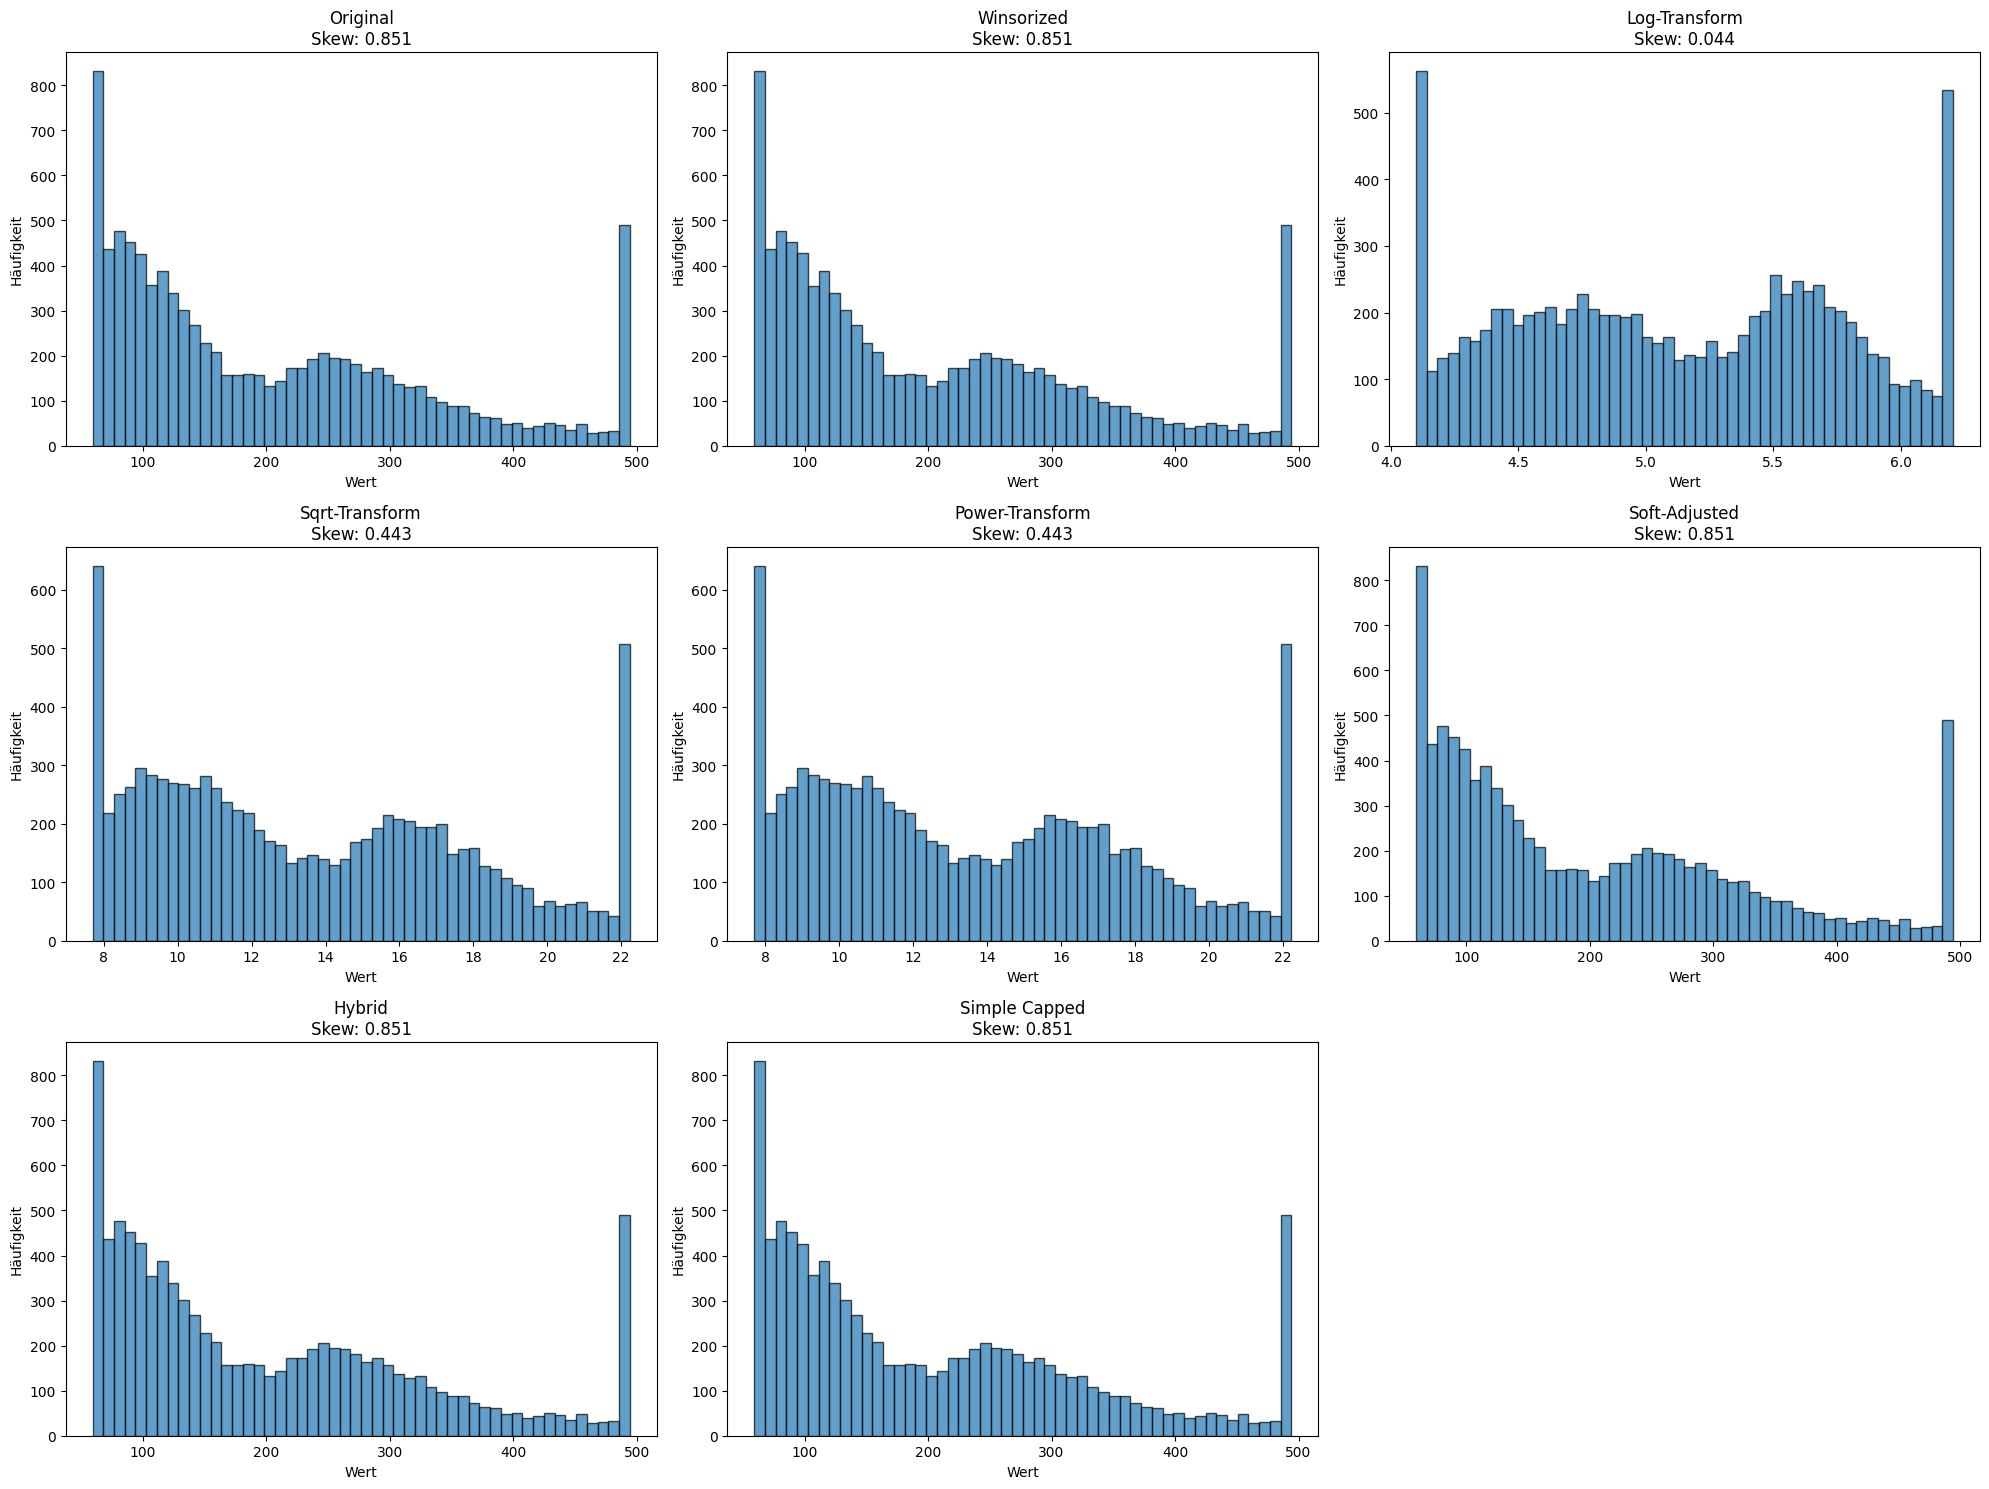


STATISTISCHER VERGLEICH ALLER ADJUSTIERUNGS-METHODEN
           Methode     Mean      Std  Skewness     Min      Max    Range
0         Original  201.420  124.754     0.851  59.209  494.259  435.050
1       Winsorized  201.421  124.753     0.851  59.215  494.255  435.040
2    Log-Transform    5.119    0.628     0.044   4.098    6.205    2.107
3   Sqrt-Transform   13.536    4.266     0.443   7.695   22.232   14.537
4  Power-Transform   13.536    4.266     0.443   7.695   22.232   14.537
5    Soft-Adjusted  201.420  124.754     0.851  59.209  494.259  435.050
6           Hybrid  201.421  124.753     0.851  59.215  494.255  435.040
7    Simple Capped  201.420  124.754     0.851  59.209  494.259  435.050

🎯 FINALE EMPFEHLUNG FÜR NEURONALE NETZE
🏆 BESTE METHODE: Log-Transform
Score: 19.83

📊 ALLE SCORES:
Log-Transform  : 19.83
Sqrt-Transform : 19.24
Power-Transform: 19.24
Winsorized     : 18.53
Hybrid         : 18.53
Original       : 18.53
Soft-Adjusted  : 18.53
Simple Capped  : 18.53

✅ F

In [5]:
# ERWEITERTE ADJUSTIERUNG-STRATEGIEN FÜR NEURONALE NETZE
print("\n" + "="*80)
print("ADJUSTIERUNG VON EXTREMWERTEN (statt nur Capping)")
print("="*80)

# 1. WINSORIZING - Ersetze Extremwerte durch Perzentile
print("\n📊 METHODE 1: WINSORIZING")
p5 = df['Umsatz'].quantile(0.05)
p95 = df['Umsatz'].quantile(0.95)
print(f"5. Perzentil: {p5:.2f}")
print(f"95. Perzentil: {p95:.2f}")

recommended_df['Umsatz_winsorized'] = df['Umsatz'].clip(lower=p5, upper=p95)

# 2. LOG-TRANSFORMATION für rechtsschiefe Verteilung
print("\n📊 METHODE 2: LOG-TRANSFORMATION")
# Log1p für Werte nahe 0
recommended_df['Umsatz_log'] = np.log1p(df['Umsatz'])

# 3. SQUARE ROOT TRANSFORMATION (weniger aggressiv als Log)
print("\n📊 METHODE 3: SQUARE ROOT TRANSFORMATION")
recommended_df['Umsatz_sqrt'] = np.sqrt(df['Umsatz'])

# 4. BOX-COX ähnliche Transformation (vereinfacht)
print("\n📊 METHODE 4: POWER TRANSFORMATION")
# Yeo-Johnson ähnlich (funktioniert auch mit negativen Werten)
lambda_param = 0.5  # Du kannst dies optimieren
recommended_df['Umsatz_power'] = np.sign(df['Umsatz']) * np.power(np.abs(df['Umsatz']), lambda_param)

# 5. ROBUST SCALING - Adjustierung basierend auf Median und IQR
print("\n📊 METHODE 5: ROBUST SCALING ADJUSTMENT")
median_umsatz = df['Umsatz'].median()
Q1 = df['Umsatz'].quantile(0.25)
Q3 = df['Umsatz'].quantile(0.75)
IQR = Q3 - Q1

# Soft-Capping: Sanfte Anpassung für Extremwerte
def soft_adjustment(x, median, iqr, factor=2.0):
    """Sanfte Anpassung von Extremwerten"""
    deviation = abs(x - median)
    if deviation > factor * iqr:
        # Sanfte Kompression für Extremwerte
        sign = np.sign(x - median)
        adjusted_deviation = factor * iqr + np.log1p(deviation - factor * iqr)
        return median + sign * adjusted_deviation
    return x

recommended_df['Umsatz_soft_adjusted'] = df['Umsatz'].apply(
    lambda x: soft_adjustment(x, median_umsatz, IQR)
)

# 6. HYBRIDE METHODE - Kombiniert mehrere Ansätze
print("\n📊 METHODE 6: HYBRIDE ADJUSTIERUNG")
# Für sehr extreme Werte: Log-Transformation
# Für moderate Ausreißer: Winsorizing
# Für normale Werte: Original beibehalten

def hybrid_adjustment(x, lower_bound, upper_bound, p5, p95):
    if x < lower_bound or x > upper_bound:
        # Extreme Ausreißer: Log-Transformation
        return np.log1p(max(x, 0))
    elif x < p5:
        return p5  # Winsorizing
    elif x > p95:
        return p95  # Winsorizing
    else:
        return x  # Original beibehalten

recommended_df['Umsatz_hybrid'] = df['Umsatz'].apply(
    lambda x: hybrid_adjustment(x, lower_bound, upper_bound, p5, p95)
)

# VISUALISIERUNG DER ADJUSTIERUNGEN
plt.figure(figsize=(20, 15))

methods = [
    ('Original', 'Umsatz'),
    ('Winsorized', 'Umsatz_winsorized'),
    ('Log-Transform', 'Umsatz_log'),
    ('Sqrt-Transform', 'Umsatz_sqrt'),
    ('Power-Transform', 'Umsatz_power'),
    ('Soft-Adjusted', 'Umsatz_soft_adjusted'),
    ('Hybrid', 'Umsatz_hybrid'),
    ('Simple Capped', 'Umsatz_capped')
]

for i, (name, col) in enumerate(methods, 1):
    plt.subplot(3, 3, i)
    if col in recommended_df.columns:
        plt.hist(recommended_df[col], bins=50, alpha=0.7, edgecolor='black')
        plt.title(f'{name}\nSkew: {recommended_df[col].skew():.3f}')
        plt.xlabel('Wert')
        plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

# STATISTIKEN FÜR ALLE METHODEN
print("\n" + "="*80)
print("STATISTISCHER VERGLEICH ALLER ADJUSTIERUNGS-METHODEN")
print("="*80)

comparison_stats = []
for name, col in methods:
    if col in recommended_df.columns:
        stats = {
            'Methode': name,
            'Mean': recommended_df[col].mean(),
            'Std': recommended_df[col].std(),
            'Skewness': recommended_df[col].skew(),
            'Min': recommended_df[col].min(),
            'Max': recommended_df[col].max(),
            'Range': recommended_df[col].max() - recommended_df[col].min()
        }
        comparison_stats.append(stats)

# Erstelle DataFrame für bessere Darstellung
stats_df = pd.DataFrame(comparison_stats)
print(stats_df.round(3))

# FINALE EMPFEHLUNG
print("\n" + "="*80)
print("🎯 FINALE EMPFEHLUNG FÜR NEURONALE NETZE")
print("="*80)

# Bewerte jede Methode
scores = {}
for name, col in methods:
    if col in recommended_df.columns:
        # Scoring-Kriterien für NN
        skew_score = max(0, 10 - abs(recommended_df[col].skew()))  # Je näher 0, desto besser
        range_score = max(0, 10 - (recommended_df[col].std() / recommended_df[col].mean()))  # Niedrige Varianz
        
        # Prüfe auf negative Werte (problematisch für manche Aktivierungsfunktionen)
        negative_penalty = 2 if recommended_df[col].min() < 0 else 0
        
        total_score = skew_score + range_score - negative_penalty
        scores[name] = total_score

# Beste Methode finden
best_method = max(scores, key=scores.get)
print(f"🏆 BESTE METHODE: {best_method}")
print(f"Score: {scores[best_method]:.2f}")

print(f"\n📊 ALLE SCORES:")
for method, score in sorted(scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{method:15}: {score:.2f}")

print(f"\n✅ FINALER DATENSATZ FÜR NN-TRAINING:")
best_col = next(col for name, col in methods if name == best_method)
print(f"Spalte zu verwenden: {best_col}")
print(f"Anzahl Datenpunkte: {len(recommended_df)}")
print(f"Wertebereich: {recommended_df[best_col].min():.2f} bis {recommended_df[best_col].max():.2f}")
print(f"Mean ± Std: {recommended_df[best_col].mean():.2f} ± {recommended_df[best_col].std():.2f}")

# Speichere den finalen Datensatz
final_df = recommended_df[['Umsatz', best_col] + [col for col in recommended_df.columns if col not in ['Umsatz', best_col]]].copy()
final_df.to_csv('/workspaces/bakery_sales_prediction/5_Datasets/additional data/data_outlier_processed.csv', index=False)
print(f"\n💾 Datensatz gespeichert als: data_outlier_processed.csv")